In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxifare=pd.read_csv("TaxiFare.csv")

In [3]:
taxifare

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
#EDA
taxifare.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
taxifare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
taxifare.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Feature Engineering

# Amount is in negative so I am removing those redundant rows

In [7]:
print('Old count: %d' % len(taxifare))
taxifare2 =taxifare[taxifare.amount>=0]
print('New count: %d' % len(taxifare2))

Old count: 50000
New count: 49994


# Fare Amount Distribution


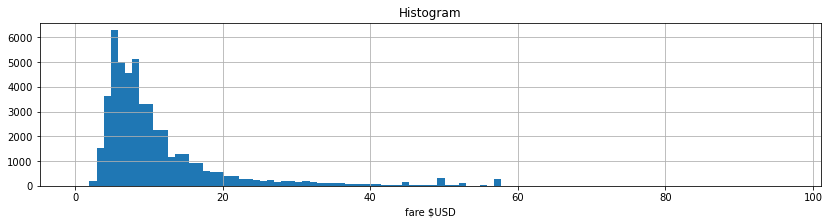

In [8]:
taxifare2[taxifare2.amount<100].amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [9]:
## Converting pickup_datetime from Object type to TimeStamp type

taxifare2["date_time_of_pickup"] = pd.to_datetime(taxifare2["date_time_of_pickup"],format='%Y-%m-%d %H:%M:%S UTC')

In [10]:
taxifare2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   unique_id             49994 non-null  object        
 1   amount                49994 non-null  float64       
 2   date_time_of_pickup   49994 non-null  datetime64[ns]
 3   longitude_of_pickup   49994 non-null  float64       
 4   latitude_of_pickup    49994 non-null  float64       
 5   longitude_of_dropoff  49994 non-null  float64       
 6   latitude_of_dropoff   49994 non-null  float64       
 7   no_of_passenger       49994 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
taxifare2.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


# Calculate the distance between two GPS location
actual lat long are not useful for modeling
we will calculate the distance between two points

In [12]:
from math import sin, cos, sqrt, atan2, radians

def calculateDistance(lt1, ln1, lt2, ln2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lt1)
    lon1 = radians(ln1)
    lat2 = radians(lt2)
    lon2 = radians(ln2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000
    
    return distance

In [13]:
taxifare2['distance']=taxifare.apply(lambda x:calculateDistance(x['latitude_of_pickup'], x['longitude_of_pickup'],x['latitude_of_dropoff'],
 x['longitude_of_dropoff']), axis=1)

In [14]:
print('Old count: %d' % len(taxifare2))
taxifare3 =taxifare2[taxifare2.distance>=0]
print('New count: %d' % len(taxifare3))

Old count: 49994
New count: 49994


# Create datetime features based on pickup_datetime

In [15]:
taxifare2['pickup_day']=taxifare2['date_time_of_pickup'].apply(lambda x:x.day)
taxifare2['pickup_hour']=taxifare2['date_time_of_pickup'].apply(lambda x:x.hour)
taxifare2['pickup_day_of_week']=taxifare2['date_time_of_pickup'].apply(lambda x:x.weekday())
taxifare2['pickup_month']=taxifare2['date_time_of_pickup'].apply(lambda x:x.month)
taxifare2['pickup_year']=taxifare2['date_time_of_pickup'].apply(lambda x:x.year)

In [16]:
taxifare2['distance']=taxifare2.apply(lambda x:calculateDistance(x['latitude_of_pickup'], x['longitude_of_pickup'],x['latitude_of_dropoff'],
 x['longitude_of_dropoff']), axis=1)

In [17]:
taxifare2.drop(columns = ['latitude_of_pickup','longitude_of_pickup','latitude_of_dropoff','longitude_of_dropoff','date_time_of_pickup'], 
          inplace = True)

In [18]:
taxifare2.head()

,unique_id,amount,no_of_passenger,distance,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,26:21.0,4.5,1,1031.087515,15,17,0,6,2009
1,52:16.0,16.9,1,8452.786283,5,16,1,1,2010
2,35:00.0,5.7,2,1389.961429,18,0,3,8,2011
3,30:42.0,7.7,1,2800.148994,21,4,5,4,2012
4,51:00.0,5.3,1,1999.784368,9,7,1,3,2010


In [19]:
taxifare2.isnull().sum()

unique_id             0
amount                0
no_of_passenger       0
distance              0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

In [20]:
taxifare2['unique_id'] = taxifare2['unique_id'].astype('category')


# After Changing the column as CATEGORY , The Values are changed by using labelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE=LabelEncoder()

In [23]:
taxifare2['unique_id']=LE.fit_transform(taxifare2.unique_id)

In [24]:
taxifare2

,unique_id,amount,no_of_passenger,distance,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,1579,4.5,1,1031.087515,15,17,0,6,2009
1,3133,16.9,1,8452.786283,5,16,1,1,2010
2,2097,5.7,2,1389.961429,18,0,3,8,2011
3,1839,7.7,1,2800.148994,21,4,5,4,2012
4,3057,5.3,1,1999.784368,9,7,1,3,2010
...,...,...,...,...,...,...,...,...,...
49995,1513,15.0,1,4941.924737,12,23,2,6,2013
49996,1157,7.5,1,874.980365,22,17,0,6,2015
49997,3177,6.9,1,2263.996585,30,4,6,1,2011
49998,540,4.5,2,665.453847,6,7,1,11,2012


In [25]:
data=taxifare2

In [26]:
data.isnull().sum()

unique_id             0
amount                0
no_of_passenger       0
distance              0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unique_id           49994 non-null  int32  
 1   amount              49994 non-null  float64
 2   no_of_passenger     49994 non-null  int64  
 3   distance            49994 non-null  float64
 4   pickup_day          49994 non-null  int64  
 5   pickup_hour         49994 non-null  int64  
 6   pickup_day_of_week  49994 non-null  int64  
 7   pickup_month        49994 non-null  int64  
 8   pickup_year         49994 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 3.6 MB


In [28]:
x_ind=data.drop("amount",axis=1)
x_ind

,unique_id,no_of_passenger,distance,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,1579,1,1031.087515,15,17,0,6,2009
1,3133,1,8452.786283,5,16,1,1,2010
2,2097,2,1389.961429,18,0,3,8,2011
3,1839,1,2800.148994,21,4,5,4,2012
4,3057,1,1999.784368,9,7,1,3,2010
...,...,...,...,...,...,...,...,...
49995,1513,1,4941.924737,12,23,2,6,2013
49996,1157,1,874.980365,22,17,0,6,2015
49997,3177,1,2263.996585,30,4,6,1,2011
49998,540,2,665.453847,6,7,1,11,2012


In [29]:
y_dep=data.amount
y_dep

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 49994, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test =train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

# RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model_rf=RandomForestRegressor()

In [35]:
model_fit=model_rf.fit(x_train,y_train)

In [36]:
y_pred=model_fit.predict(x_test)

In [37]:
y_pred

array([21.1116,  6.544 ,  6.327 , ..., 16.377 ,  5.885 ,  4.714 ])

In [50]:
y_pred.shape

(9999,)

In [55]:
df=pd.DataFrame({"x":range(0,9999),"Predicted":y_pred,"Original":y_test})
df

,x,Predicted,Original
36260,0,21.1116,14.5
26146,1,6.5440,6.1
11428,2,6.3270,4.5
8678,3,11.0160,13.7
35268,4,5.6810,5.3
...,...,...,...
41646,9994,6.0460,17.3
18337,9995,14.5233,13.0
47089,9996,16.3770,15.3
46318,9997,5.8850,8.9


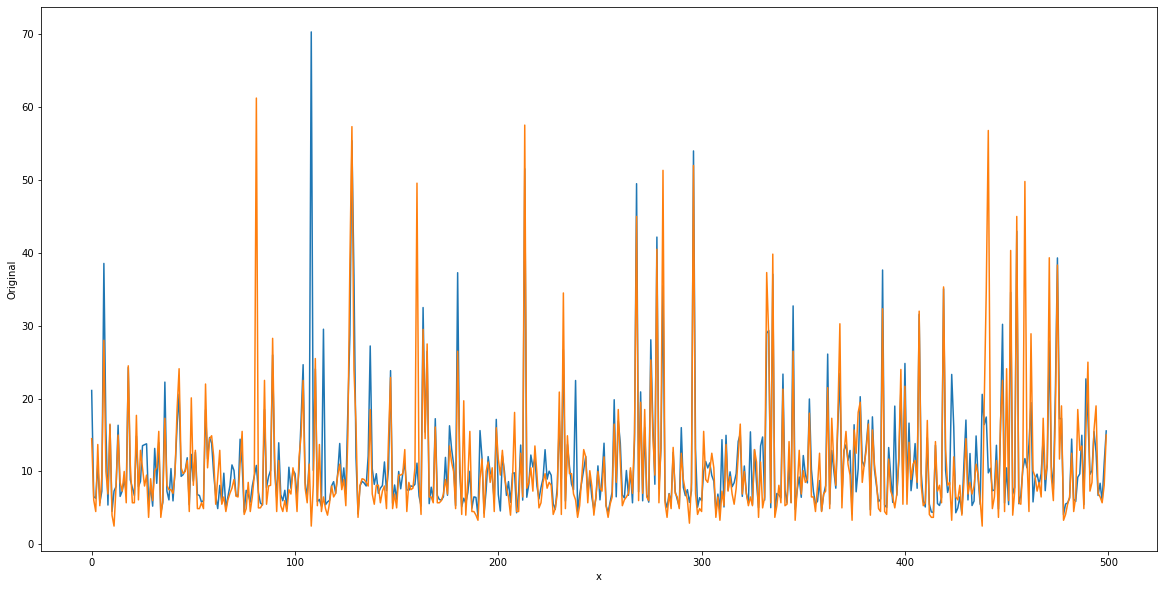

In [67]:
plt.figure(figsize=(20,10))
sb.lineplot(x="x", y="Predicted",data=df.head(500))
sb.lineplot(x="x", y="Original",data=df.head(500))


In [44]:
from sklearn.metrics import mean_squared_error as ms

In [48]:
mean_square_error=ms(y_test,y_pred)

In [49]:
mean_square_error

23.96424188911591